In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from pandas import DataFrame
%pylab inline
np.set_printoptions(precision=3, suppress=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()
# названия переменных
print(iris.feature_names)
# данные
print(iris.data[:10])
# целевая переменная
print(iris.target_names)
print(iris.target)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
iris_frame = DataFrame(iris.data)
# обозначение колонок и целевых переменных
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


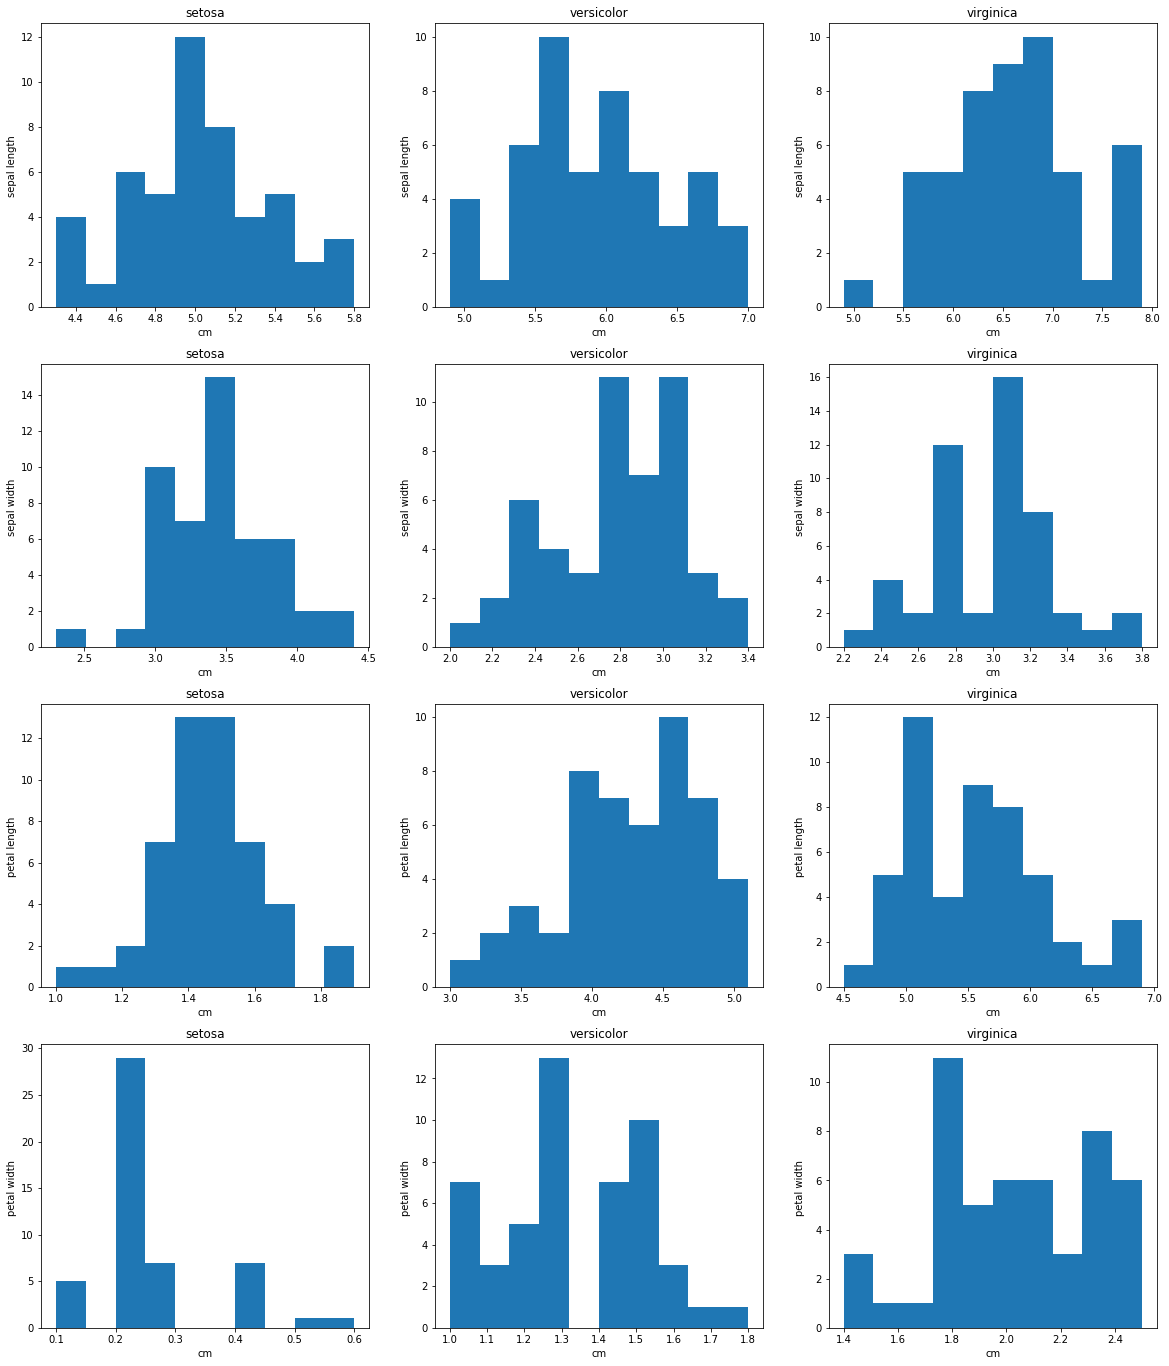

In [4]:
# Статистика: гистограмма по каждому признаку: 
pyplot.figure(figsize(20, 24))
plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
       plot_number += 1
       pyplot.subplot(4, 3, plot_number)
       pyplot.hist(iris_frame[iris_frame.name == target_name][feature_name])
       pyplot.title(target_name)
       pyplot.xlabel('cm')
       pyplot.ylabel(feature_name[:-4])

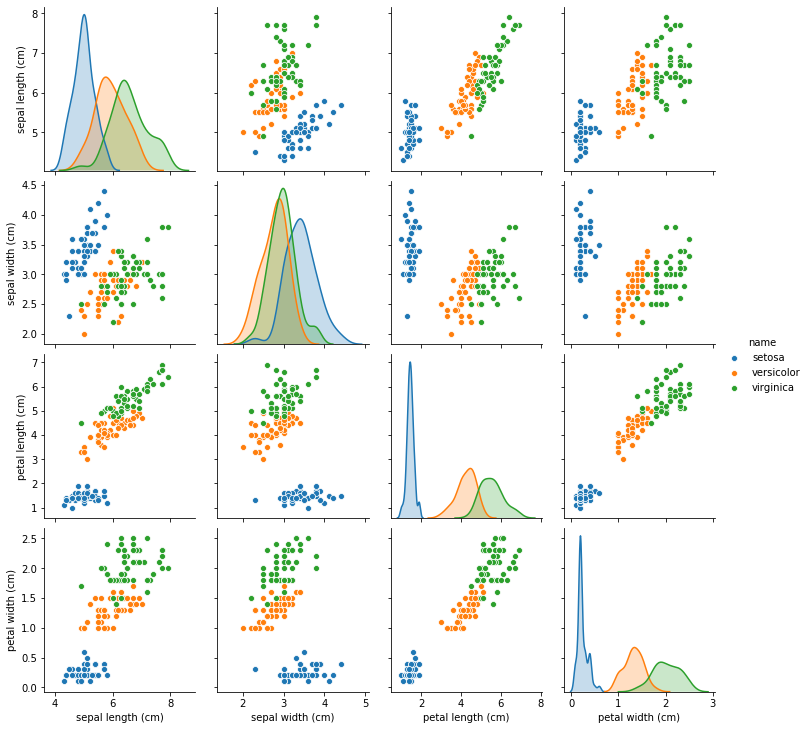

In [5]:
import seaborn as sns

sns.pairplot(iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)','name']], hue = 'name')

меньше всего сорта перемешаны при использовании признака petal width и petal length

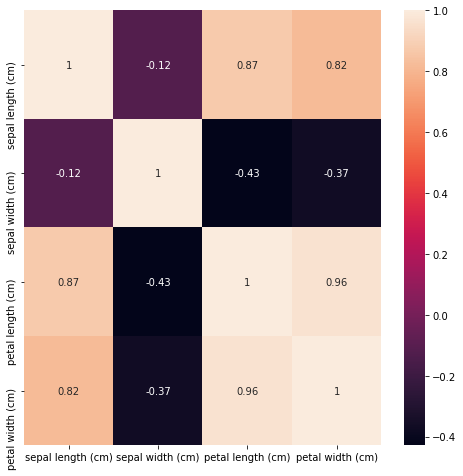

In [6]:
import seaborn as sns

corr = iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']].corr()
mask = np.zeros_like(corr)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, annot=True, ax=ax)

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(
    iris_frame[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], iris_frame['target'], test_size = 0.3, random_state = 0)
train_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
60,5.0,2.0,3.5,1.0
116,6.5,3.0,5.5,1.8
144,6.7,3.3,5.7,2.5
119,6.0,2.2,5.0,1.5
108,6.7,2.5,5.8,1.8
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [8]:
train_data = np.array(train_data)
test_data = np.array(test_data)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

def to_matrix(v):
    return np.resize(v, (v.shape[0], 1))


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score

# обучаем и тестируем со всеми признаками
model = RandomForestClassifier()
model.fit(train_data, train_labels)
train_predicted = model.predict(train_data)
test_predicted = model.predict(test_data)

train_error = balanced_accuracy_score(train_labels, train_predicted)
test_error = balanced_accuracy_score(test_labels, test_predicted)
print(f"Train error: {train_error:0.3}, Test error: {test_error:0.3}")

Train error: 1.0, Test error: 0.981


In [10]:
# выполняем svd-разложение
U, s, W = np.linalg.svd(train_data)
V = W.T

In [11]:
print(s)

[81.184 14.769  2.927  1.455]


In [12]:
k = 2
# проецируем на подпространство из k базисных векторов V, с наибольшими сингулярными числами (увеличениями)
Vr = V[:, 0:k]
Vr

array([[-0.75 , -0.293],
       [-0.375, -0.545],
       [-0.518,  0.704],
       [-0.171,  0.348]])

In [13]:
# отдельно тренировочные и тестовые данные
train_data_r = np.dot(train_data, Vr)
test_data_r = np.dot(test_data, Vr)

#D = np.zeros_like(train_data, dtype=float)
#D[np.diag_indices(min(train_data.shape))] = s
#train_data_r - np.dot(U[:,0:k], D[0:k, 0:k])
##test_data_r

In [14]:
# строим модель для k признаков из подпространства V, тренируем и  предсказываем

model_r = RandomForestClassifier()
model_r.fit(train_data_r, train_labels)
train_predicted_r = model_r.predict(train_data_r)
test_predicted_r = model_r.predict(test_data_r)

train_error_r = balanced_accuracy_score(train_labels, train_predicted_r)
test_error_r = balanced_accuracy_score(test_labels, test_predicted_r)
print(f"Train error_r: {train_error_r:0.3}, Test error_r: {test_error_r:0.3}")

Train error_r: 1.0, Test error_r: 0.981


In [15]:
# строим модель для k признаков из исходного пространства для сравнения, тренируем и  предсказываем
train_data_r0 = train_data[:,0:k]
test_data_r0 = test_data[:,0:k]

model_r0 = RandomForestClassifier()
model_r0.fit(train_data_r0, train_labels)
train_predicted_r0 = model_r0.predict(train_data_r0)
test_predicted_r0 = model_r0.predict(test_data_r0)

train_error_r0 = balanced_accuracy_score(train_labels, train_predicted_r0)
test_error_r0 = balanced_accuracy_score(test_labels, test_predicted_r0)
print(f"Train error_r: {train_error_r0:0.3}, Test error_r: {test_error_r0:0.3}")

Train error_r: 0.945, Test error_r: 0.657


In [16]:
# сравним результаты предсказаний: правильный, по k признаков из подпространства V, по k признаков из исходного пространства, по исходным признакам
np.concatenate((to_matrix(test_labels), to_matrix(test_predicted_r), to_matrix(test_predicted_r0), to_matrix(test_predicted)), 1)

array([[2, 2, 1, 2],
       [1, 1, 2, 1],
       [0, 0, 0, 0],
       [2, 2, 2, 2],
       [0, 0, 0, 0],
       [2, 2, 1, 2],
       [0, 0, 0, 0],
       [1, 1, 1, 1],
       [1, 1, 2, 1],
       [1, 1, 2, 1],
       [2, 2, 2, 2],
       [1, 1, 2, 1],
       [1, 1, 2, 1],
       [1, 1, 2, 1],
       [1, 1, 2, 1],
       [0, 0, 0, 0],
       [1, 1, 2, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [2, 2, 1, 2],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [2, 2, 2, 2],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [1, 1, 2, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [2, 2, 2, 2],
       [1, 1, 0, 1],
       [0, 0, 0, 0],
       [2, 2, 1, 2],
       [2, 2, 2, 2],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [1, 2, 2, 2],
       [1, 1, 2, 1],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [0, 0, 0, 0],
       [2, 2, 2, 2],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

Вывод: удалось уменьшить число признаков до 2х из подпространства V без потери точности (иногда случайно неправильно предсказывался один элемент). Уменьшение до 1 признака из подпространства V приводило к существенной потере точности (до 0.77). Простое отбрасывание даже одного исходного признака в ори